In [8]:
pip install numpy==1.20.3


  Using cached numpy-1.20.3-cp38-cp38-win_amd64.whl.metadata (2.0 kB)
Using cached numpy-1.20.3-cp38-cp38-win_amd64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torchvision
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import yaml


In [2]:
import sys
# Add the path to your YOLOv7 repository to the Python path
sys.path.append(r"C:/Users/Baron/Desktop/yolov7")

# Now, you can import the module or class you need
from models.yolo import Model  # Replace 'yolov7' with the actual model class name

In [3]:
 map_location=torch.device('cpu')

### Live Video

In [4]:
import torch
import cv2
import numpy as np

# Load the YOLOv7 model using torch.hub (pointing to your local repository)
# Load the YOLOv7 model using torch.hub (pointing to your local repository)
model = torch.hub.load('C:/Users/Baron/Desktop/yolov7', 'custom', 'C:/Users/Baron/Desktop/yolov7/yolov7.pt', source='local')

# Set the model to evaluation mode (remove if you had issues with it)
model.eval()
# Function to perform object detection on a frame
def detect_objects(frame):
    # Convert frame to RGB (YOLO expects RGB format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Run the YOLO model
    results = model([rgb_frame], size=640)  # Adjust size as needed
    
    # Get the results in a DataFrame
    detections = results.pandas().xyxy[0]
    
    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        confidence = row['confidence']
        label = row['name']
        
        # Draw a rectangle and label
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"{label} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return frame

# Capture video from webcam or video file
cap = cv2.VideoCapture(0)  # Use 0 for webcam, or replace with video file path

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Run the detection function
    frame = detect_objects(frame)
    
    # Display the frame with detection results
    cv2.imshow('YOLOv7 Object Detection', frame)
    
    # Press 'q' to quit the video display
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

C:/Users/Baron/Desktop/yolov7\hubconf.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(

Adding autoShape... 


C:\Users/Baron/Desktop/yolov7\models\common.py:921: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(enabled=p.device.type != 'cpu'):
C:\Users\Baron\%ML_PATH%\baron_env\lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Still Images



In [10]:
import torch
import cv2
import numpy as np

# Load the YOLOv7 model using torch.hub (pointing to your local repository)
# Load the YOLOv7 model using torch.hub (pointing to your local repository)
model = torch.hub.load('C:/Users/Baron/Desktop/yolov7', 'custom', 'C:/Users/Baron/Desktop/yolov7/yolov7.pt', source='local')

# Set the model to evaluation mode (remove if you had issues with it)
model.eval()

# Function to perform object detection on an image
def detect_objects_still(image_path):
    # Read the image from the specified path
    frame = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if frame is None:
        raise FileNotFoundError(f"Image at {image_path} not found.")
    
    # Convert frame to RGB (YOLO expects RGB format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Run the YOLO model
    results = model([rgb_frame], size=640)  # Adjust size as needed
    
    # Get the results in a DataFrame
    detections = results.pandas().xyxy[0]
    
    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        confidence = row['confidence']
        label = row['name']
        
        # Draw a rectangle and label
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"{label} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Display the image with detection results
    cv2.imshow('YOLOv7 Object Detection', frame)
    cv2.waitKey(0)  # Wait for a key press to close the image window
    cv2.destroyAllWindows()

# Run the function on a sample image (replace 'path/to/your/image.jpg' with your image path)
#image = cv2.imread("C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env/pictures/elephant.jpg")
detect_objects("C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env/pictures/elephant.jpg")

C:/Users/Baron/Desktop/yolov7\hubconf.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(

Adding autoShape... 


In [12]:

detect_objects_still("C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env/pictures/cars.png")

In [ ]:
# Load the YOLOv7 pose estimation model using torch.hub (pointing to your local repository)
model = torch.hub.load('C:/Users/Baron/Desktop/yolov7', 'custom', 'C:/Users/Baron/Desktop/yolov7/yolov7-w6-pose.pt', source='local')
model.eval()  # Set the model to evaluation mode



# Add the YOLOv7 directory to the Python path
sys.path.append('C:/Users/Baron/Desktop/yolov7')
# Import the model class directly (adjust according to your repository structure)
from models.experimental import attempt_load  # Replace with the actual model import if different
# Load the model weights
weights_path = 'C:/Users/Baron/Desktop/yolov7/yolov7-w6-pose.pt'
device = torch.device('cpu')  # Change to 'cuda' if using a GPU
# Load the model
model = attempt_load(weights_path, map_location=device)

### Yolov7 Pose Estimation

In [43]:

import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts



In [56]:

def detect_objects_still(image_path):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    weigths = torch.load('C:/Users/Baron/Desktop/yolov7/yolov7-w6-pose.pt', map_location=device)
    model = weigths['model']
    _ = model.float().eval()
    
    if torch.cuda.is_available():
        model.half().to(device)
    
    image = cv2.imread(image_path)
    image = letterbox(image, 960, stride=64, auto=True)[0]
    image_ = image.copy()
    image = transforms.ToTensor()(image)
    image = torch.tensor(np.array([image.numpy()]))
    
    if torch.cuda.is_available():
        image = image.half().to(device)   
    output, _ = model(image)


    output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
    with torch.no_grad():
        output = output_to_keypoint(output)
    nimg = image[0].permute(1, 2, 0) * 255
    nimg = nimg.cpu().numpy().astype(np.uint8)
    nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
    for idx in range(output.shape[0]):
        plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)
    

C:\Users\Baron\AppData\Local\Temp\ipykernel_11880\1966441460.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weigths = torch.load('C:/Users/Baron/Desktop/yolov7/yolov7-w

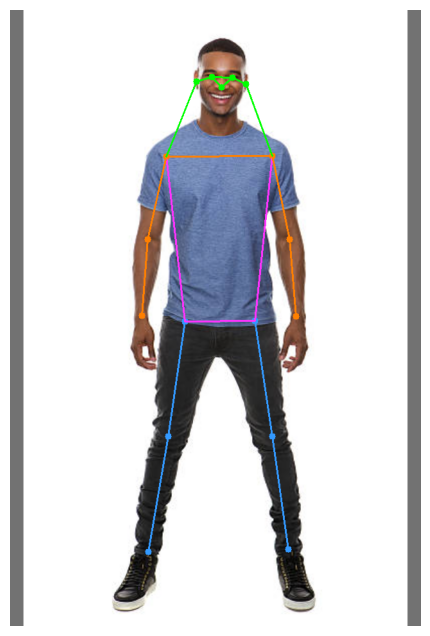

In [50]:
detect_objects_still("C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env/pictures/bman.jpg")

In [60]:
# Function to plot the skeleton keypoints on an image
def plot_skeleton_kpts(img, keypoints, threshold=0.5):
    # Define connections between keypoints (pairs of keypoints)
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Right arm
        (0, 5), (5, 6), (6, 7), (7, 8),  # Left arm
        (1, 8), (5, 11), (11, 12), (12, 13),  # Torso
        (0, 15), (15, 16),  # Neck and head
        (11, 14), (14, 15)  # Hip and top connection
    ]

    # Loop through each keypoint pair and draw a line
    for (start, end) in connections:
        if keypoints[start, 2] > threshold and keypoints[end, 2] > threshold:  # Check confidence threshold
            cv2.line(img, tuple(keypoints[start, :2].astype(int)), tuple(keypoints[end, :2].astype(int)), (0, 255, 0), 2)
    
    # Draw each keypoint
    for kp in keypoints:
        if kp[2] > threshold:  # Check confidence threshold
            cv2.circle(img, (int(kp[0]), int(kp[1])), 3, (0, 0, 255), -1)

# Pose estimation function
def detect_pose(image_path):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    weights = torch.load('C:/Users/Baron/Desktop/yolov7/yolov7-w6-pose.pt', map_location=device)
    model = weights['model']
    _ = model.float().eval()

    if torch.cuda.is_available():
        model.half().to(device)

    image = cv2.imread(image_path)
    image = letterbox(image, 960, stride=64, auto=True)[0]
    image_ = image.copy()
    image = transforms.ToTensor()(image)
    image = torch.tensor(np.array([image.numpy()]))

    if torch.cuda.is_available():
        image = image.half().to(device)

    output, _ = model(image)
    output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
    with torch.no_grad():
        output = output_to_keypoint(output)

    nimg = image[0].permute(1, 2, 0) * 255
    nimg = nimg.cpu().numpy().astype(np.uint8)
    nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)

    for idx in range(output.shape[0]):
        keypoints = output[idx, 7:].T.reshape(-1, 3)  # Reshape to (num_keypoints, 3)
        plot_skeleton_kpts(nimg, keypoints, 0.5)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(nimg)
    plt.show()

C:\Users\Baron\AppData\Local\Temp\ipykernel_11880\4055521284.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load('C:/Users/Baron/Desktop/yolov7/yolov7-

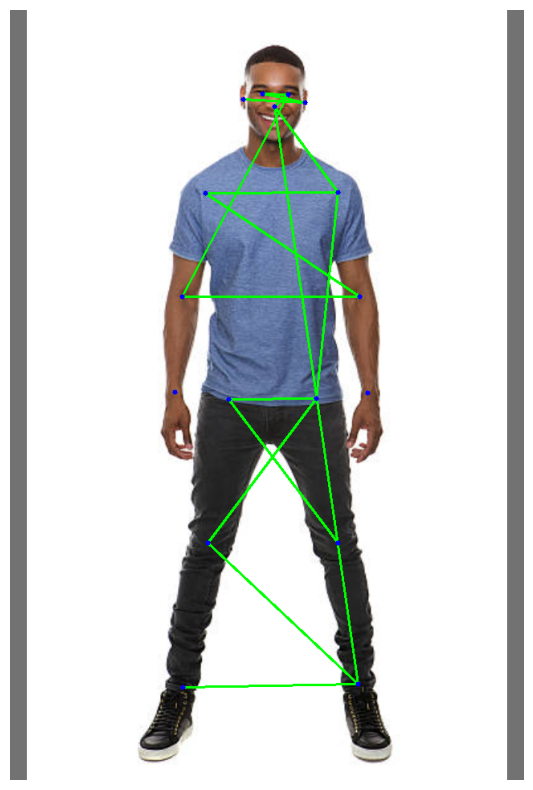

In [61]:
detect_pose("C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env/pictures/bman.jpg")